# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: The goal is to see if there are customer attributes and useage that correlate to spending habits.  First the general trends of the data will be determined, the number of rows, the mean, median, the interquantile range, and the distribution of the data. Once general trends of the data are explored will implement further data analysis of the customer variables to explore possible relationships with the predictors to influce customer activities. 

#### 2. What are the predictors/covariates? 

$y$ = $B_0$ + $B_1$$X$

Answer: The covariates, or independent variables are the attributes of the customers, their, age, gender, location, and profession, and last log in, and activity score. These variables possibly influence the predictor - wich is the customer converting converting from a free-tier customer to a paying customer. $B_1$X are the covariates and $y$ is the dependent variable.

#### 3. What timeframe is this data relevent for?

Answer: January to April 2015. The data could still be _relevant_ for today, but eventually will be too outdated to make business decisions from expecially as the internet changes thus ways people interact with the internet and how they spend online changes

#### 4. What is the hypothesis?

$H_0$

Answer: Hypothesis: If days since last log in is less than 14 days, customer has a higher correlation or p value to convert to paying customers

## Let's get started with our dataset

In [6]:
!pwd

/c/Users/Amber/Documents/GitHub/DataSciCourse/projects/unit-projects/project-1/starter-code


In [42]:
df = pd.read_csv("../../project-1/assets/admissions.csv")

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# !pip install pandas --upgrade

%matplotlib inline

In [43]:
df.head(10)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### 1. Create a data dictionary 

Answer: 

Variable | Summary | Description | Type of Variable | 
---| ---| --- | ---
admit | admitted to UCLA or not | 1 admitted, 0 not admitted | binary
GRE | Graduate Record Examinations - standarized test |integers - range from 200 - 800 | discrete*
GPA | Grade Point Average - summation rank of course grades  |floats with precision to the hundredths - range from 0.00 to 4.00 | continous
prestige | rank of undergraduates' university | integers 4 to 1 (highest)| ordinal

*although GRE score is technically discrete it will be treated as continuous for the purpose of this study, meaning used for graphs where the x-axis is continuous


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: <br/>Purpose of this study is to explore and describe basic stastical trends of the data then to determine if changes in $X$ lead to predicted outcomes in $Y$

#### 3. What are the predictors/covariates? 

Answer:<br/> $Y$ = $B_0$ + $B_1$$X$ The covariates $B_1$ are **GRE**, **GPA**, and **prestige**. The predictors $Y$ is admittance (**admit**) to the University 

#### 4. What timeframe is this data relevent for?

Answer: <br/>The data here is hypothetical. There is no metadata on dates of this dataset.  Perhaps the timeframe that this data is relevant for is as long as UCLA is around, as long as these covariates are relevant for determining admissions in time of preforming analysis. 

#### 4. What is the hypothesis?

Answer: <br/>
$H_0$<br/>
Higher GRE scores have higher correlation to addmitance to UCLA. Increase in GRE leads to more instances of admit = 1

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

In [10]:
!pwd

/c/Users/Amber/Documents/GitHub/DataSciCourse/projects/unit-projects/project-1/starter-code


In [16]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [51]:
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [33]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

#### 1. What are the goals of the exploratory analysis? 

Answer: <br/>Exploratory analysis allows unbiased exploration of data, to use data mining and statists to allow trends to emerge. Primarly exploratory analysis is to gain a foundation of the data, the overall summations of the dataset. 

#### 2a. What are the assumptions of the distribution of data? 

Answer:<br/> For distribution I assume that there will be a large distribution of GRE and GPA for anyone can apply. I am assuming that the variability will decrease in the covariates when the predictor variable when admissions is equal to 1.  When admissions equals 1 I assume that the distribution will be less, that the data will be more symmetrical, and that the data will have higher kurtosis. 

#### 2b. How will determine the distribution of your data? 

Answer: <br/>The standard deviation and the mean show a peliminary distribution of the data. Normal Distribution chart shows the distribution of the data from the mean, if the data is skewed, and the degree of gravity to the mean.  Detemining the quantiles and interquantile range shows the distribution of the data.   Visualization of this is aided with box-and-wisker plots, histograms, scatter plots, and the bell-curve of the data. <br/>
1 - Standard Deviaiton and the mean <br/>
2 - Check for Outliers <br/>
3 - Determine the Quantiles and Inner Quantile Range <br />
4 - Determine how normal the distribution is, along with skewedness, and kurtosis

In [91]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [82]:
df2 = df.copy()
df3 = df2.dropna()
print df3.shape
print df.shape

(397, 4)
(400, 4)


Here a new dataframe was created that removed the null values out of the dataset and was assigned to a new data frame.  `DataFrame.dropna()` removes the whole row where any column contains a null value.  This ends up removing data from the dataset.  Seen by `DataFrame.shape` only a few records were removed, 3 to be exact.  As seen in summary stastitics of the original data set in `df.describe()` and below in the data set with removed NULL values in `df3.describe()` removal of the null values has very little effect on the mean and standard deviaiton.  Additionally the minimun and maximum values are the same meaning no potential outliers have been removed. 

In [99]:
df3.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [121]:
dic = {
   "variables" : ["gre", "gpa", "prestige"],
    "means" : [587.86, 3.39, 2.49],
    "stds" : [115.72, .38, .95]
}

# def average(numbers):
#     total = float(sum(numbers))
#     return total/len(numbers)
# def greRelativeStddev(dic):
#     for key in dic:
#         return =  (float(dic["stds"])/(dic["means"]))*100
        
# print greRelativeStddev(dic)
        
print dic

{'variables': ['gre', 'gpa', 'prestige'], 'stds': [115.72, 0.38, 0.95], 'means': [587.86, 3.39, 2.49]}


Trying to return Relative Standard Deviation for each Variable.
Below are the manual results

Variable | Mean | Standard Deviation | Relative Standard Deviation | 
---| ---| --- | ---
GRE | 587.86 | 115.72 | 19.7%
GPA | 3.39 | 0.38 | 11.2%
prestige | 2.49 | 0.95 | 38.2%

By calculating the Relative Standard Deviation - prestige has the greatest Standard Deviation in respect to the mean, followed by GRE and lastly, GPA, however standard deviation of prestige is somewhat untelling because this variable has only 4 ordinal values. Essentially GRE has a greater distribution than GPA,. GRE data is less centered around the mean than GPA and prestige is least centered around the mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017876BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000179D7B70>]], dtype=object)

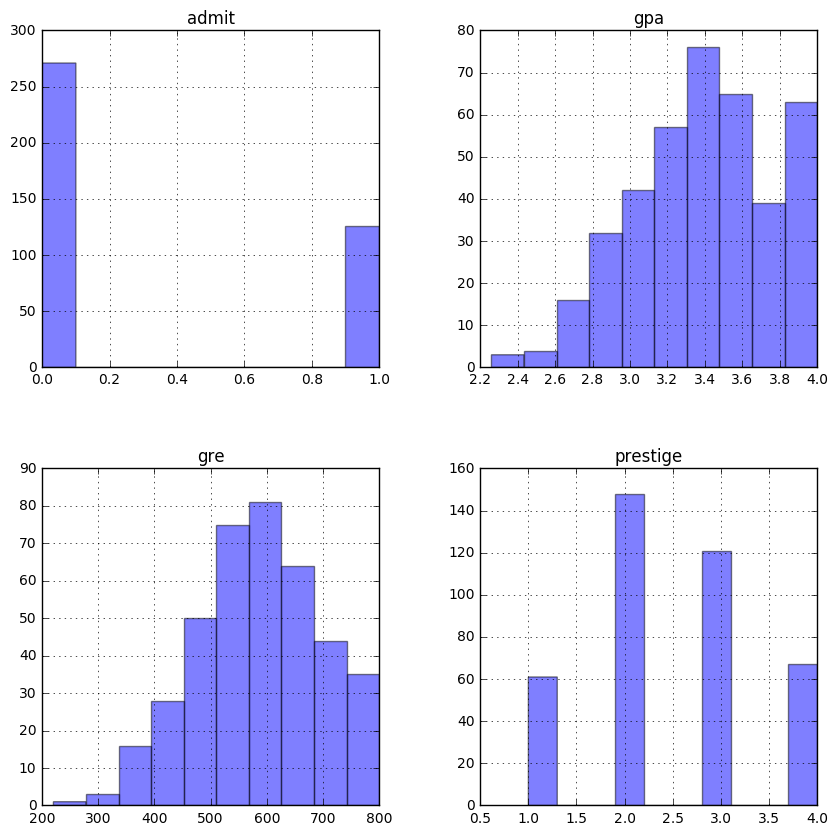

In [176]:
plt.figure()

df3.hist(color=('b'), alpha=.5, bins=10, figsize = (10,10)) 

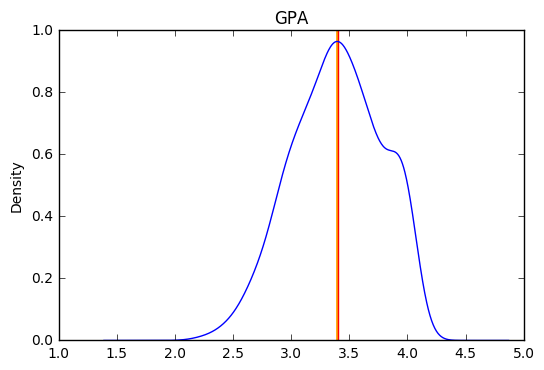

In [245]:
plt.figure()
df3.gpa.plot.kde(title = 'GPA')

plt.vlines(df3.gpa.mean(), ymin = 0, ymax = 1, linewidth = 2.0, color = 'orange')
plt.vlines(df3.gpa.median(), ymin = 0, ymax = 1, linewidth = 1.0, color = 'red')

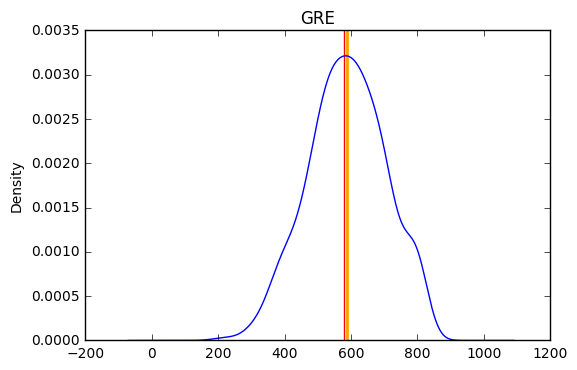

In [244]:
plt.figure()
df3.gre.plot.kde(title = 'GRE')

plt.vlines(df3.gre.mean(), ymin = 0, ymax = 0.0035, linewidth = 2.0, color = 'orange')
plt.vlines(df3.gre.median(), ymin = 0, ymax = 0.0035, linewidth = 1.0, color = 'red')

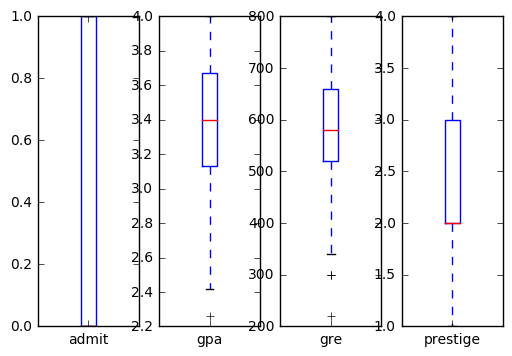

In [209]:
fig, axs = plt.subplots(1,4)
df3.admit.plot.box(ax = axs[0])
df3.gpa.plot.box(ax = axs[1])
df3.gre.plot.box(ax = axs[2])
df3.prestige.plot.box(ax = axs[3])

In [142]:
df3.hist(df3, column = "gre")

TypeError: hist_frame() got multiple values for keyword argument 'column'

#### 3a. How might outliers impact your analysis? 

Answer: <br/>Outliers could affect the mean. Extreme outliers can affect the mean significantly expecially the smaller the daset in number of records. With the admissions dataset the meand could be affected where admittance with a fairly low GPA or GRE could possibly bring down the average significantly enough to appear that lower GREs are acceptable for college admittance. 

#### 3b. How will you test for outliers? 

Answer: <br/>
A.)<br/>
1st - See if there are extreemes on either end with the max and min and see how far away these values are in respect to the mean. Determine if these values are outside the interquantile range times the interquantile range <br/>

B.) Test if outliers has an impact or significant impact on the mean.

#### 4a. What is colinearity? 

Answer: <br/>Colinearity describes relationships between the data, how values or occurances might result in trends. Observations then can predict other values in the data. Colinearity occurs when there is correlation between the variables to a degree that one can predict the other.

#### 4b. How will you test for colinearity? 

Answer: <br/>The pandas function `DataFrame.corr()` returns a colinearity matrix for the values.  The colinearity value ranges from -1 to 1.  The closer to 0 the less correlation there is. -1 is a perfect anti- correlation and 1 is a perfect correlation. .25 represents a weak positive correlation.  

In [87]:
Correlations = df3.corr()
print Correlations

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model